# Perkenalan
1. Nama : Cindra C
2. Batch : 9 Data Science

# Milestone 1

### Description: 
These are data that shows information of sales history in a supermarket. 

### Objective
As time goes by, the competition and the behaviour of buyer is changing and I need to adapt. Based on the data I want to know what can I do to improve my revenue and service of our customer. I need to investigate the data and get some insights

### Problem : 
1. How can we increase our revenue?
2. How can I make sure that our services is good enough ?
3. Between all of the product we sale, which one that gave us profit? 

## Import Library

In [204]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import numpy as np

## Data Loading

In [167]:
data = pd.read_csv('D:\H8 Cindra\graded\Milestone\p0---ftds009---ml1-lissura\supermarket_sales - Sheet1.csv')
data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


Attribute information

- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## Data Cleaning

Checking missing values

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

The data have no missing values

I need to rename every column into lower case to avoid typos

In [169]:
data = data.rename(columns={ 'Customer type' : 'cust_type','Unit price' : 'unit_price', 
'Tax 5%' : 'tax_5%', 'Branch':'branch',
'gross income' : 'gross_income', 'Rating' : 'rating', 'Total' : 'total', 'Date':'date', 'Time':'time',
'Gender' :'gender', 'Product line' : 'product_line', 'Payment' :'payment', 'Quantity' : 'quantity'
})

Converting Date into date type for further analysis.

In [170]:
data['date']= pd.to_datetime(data['date'])
data["date2"] = data["date"].dt.strftime("%d-%m-%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   cust_type                1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5%                   1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

In [171]:
print(data.date.min())
print(data.date2.min())

2019-01-01 00:00:00
01-01-2019


In [172]:
data.head(2)

,Invoice ID,branch,City,cust_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross margin percentage,gross_income,rating,date2
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,05-01-2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,08-03-2019


In [173]:
#change the time column into hour only
data['time'] = data['time'].str.split(':', expand=True).get(0).astype('int64')
data.head(2)

,Invoice ID,branch,City,cust_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross margin percentage,gross_income,rating,date2
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,05-01-2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,08-03-2019


Okay, time to explore our data.

In [210]:
data.to_csv('cleanData.csv') #exporting new clean data

## EDA

### What time is the busiest time for shopping in each branch?

Taking the amount of quantity by time in each branch

In [175]:
busy_time_graph= px.histogram(data.sort_values("branch"), x='time', y='quantity' ,color='branch', barmode='group')
busy_time_graph.show()

It's hard for us to see from histogram. We need to calculate the total of quantity that bought in time

In [211]:
total_Q = data.groupby(['branch','time'])['quantity'].sum()
total_Q= total_Q.groupby("time").mean().reset_index()
total_Q_sorted=total_Q.sort_values('quantity',ascending=False)

Let's revisualize it

In [177]:
busy_time_graph.add_trace(go.Scatter(x=total_Q.time, y=total_Q['quantity'], line_dash = 'dash', line_color = 'black', name="Quantity"))

In [212]:
print(f'The busiest time is at {total_Q_sorted.values[0,0]} with average  {total_Q_sorted.values[0,1] } of purchased quantity')

The busiest time is at 19.0 with average  216.33333333333334 of purchased quantity


### Which branch that have most income?

Taking data only for the branch

In [178]:
df_branch = data.groupby('branch').count()

I'll take the gross income as our calculation for income

In [179]:
gross_income = data.groupby(['branch'])['gross_income'].sum()
gross_income_max = gross_income.sort_values(ascending=False).reset_index()
print (f'The branch that have highest gross income is branch {gross_income_max.values[0,0]} by {gross_income_max.values[0,1]} of gross income')

The branch that have highest gross income is branch C by 5265.1765 of gross income


Visualization of Most Income Branch

In [213]:
px.histogram(data.sort_values('branch'),x='branch', y='gross_income', color = 'branch', title='Gross Income each Branch')

Branch that has the most income is branch C

### Most Profitable Product
Most Profitable Product is the amount of gross income we got each product

Querying the data to take the total of gross income from product line

In [215]:
profitable_product = data.groupby('product_line')['gross_income'].sum().sort_values(ascending=False).reset_index()
profitable_product

,product_line,gross_income
0,Food and beverages,2673.5640
1,Sports and travel,2624.8965
2,Electronic accessories,2587.5015
3,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
5,Health and beauty,2342.5590


In [ ]:
print (f'The most profitable product is {profitable_product.values[0,0]} with {profitable_product.values[0,1]} gross income')

Visualisation of Most Profitable Product

In [183]:
most_profit_product_bar = data.groupby('product_line')['gross_income'].sum().reset_index()
px.bar( x=profitable_product.product_line,y=profitable_product.gross_income, color=profitable_product.product_line )

### Is there any relation between rating and price ?

As a business man, we need to concern with our services and satisfaction form user. Therefore lets take a look in rating.

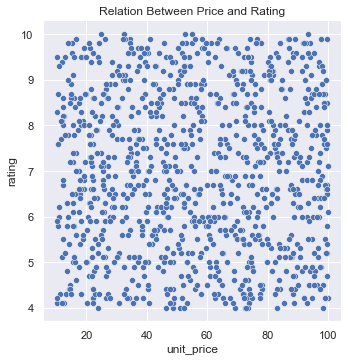

In [187]:
sns.relplot( x=data["unit_price"], y=data["rating"],ci=None).set(title='Relation Between Price and Rating')

There is no relation between ratings and price. It's mean the price doesn't affecting our price.

## Hypothesis Testing

### I've been told that branch B has the lowest of the quanity. Is that true? If it is true then will hire new sales man. We will test whether the quantity sold in specific branch significantly different or not

Querying the data of amount of quantity sold at operating hour and split it for each branch

In [199]:
A_time= (data[data['branch']=='A'][['time','quantity']].groupby('time').sum())   
B_time= (data[data['branch']=='B'][['time','quantity']].groupby('time').sum())
C_time= (data[data['branch']=='C'][['time','quantity']].groupby('time').sum())

print('The average of quantity in branch A is : ', A_time.quantity.mean())
print('The average of quantity in branch B is : ',B_time.quantity.mean())
print('The average of quantity in branch C is : ',C_time.quantity.mean())

The average of quantity in branch A is :  169.0
The average of quantity in branch B is :  165.45454545454547
The average of quantity in branch C is :  166.45454545454547


Well, Branch B and Branch C have the similar value. Let's do the test for this branches

H0 : myuB = myuC

H1 : myuB != myuC

In [203]:
t_stat, p_val = stats.ttest_ind(B_time,C_time)
print('P-value:',p_val)

P-value: [0.95442731]


With the use of 95 Confidence Interval (0.05), P value is higher than Critical Value. This conclude we can accept our null hypothesis (H0).

Visualize:

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



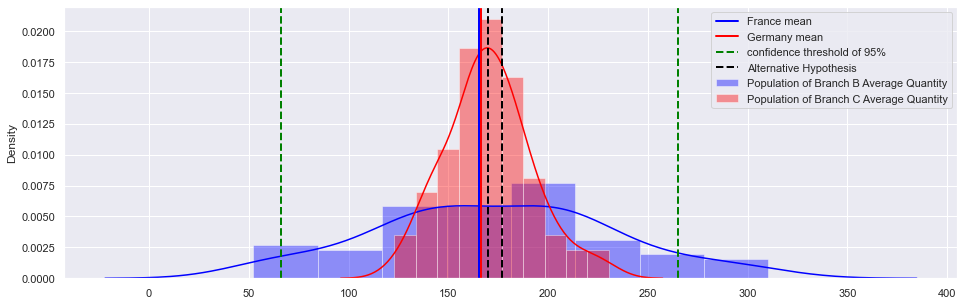

In [209]:
B_Population = np.random.normal(B_time.quantity.mean(),B_time.quantity.std(),80)
C_Population = np.random.normal(C_time.quantity.mean(),C_time.quantity.std(),80)

ci = stats.norm.interval(0.95, B_time.quantity.mean(), B_time.quantity.std())
plt.figure(figsize=(16,5))
sns.distplot(B_Population, label='Population of Branch B Average Quantity',color='blue')
sns.distplot(C_Population, label='Population of Branch C Average Quantity',color='red')

plt.axvline(B_time.quantity.mean(), color='blue', linewidth=2, label='France mean')
plt.axvline(C_time.quantity.mean(), color='red',  linewidth=2, label='Germany mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(B_Population.mean()+t_stat[0]*B_Population.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(B_Population.mean()-t_stat[0]*B_Population.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

The blackline (our H1) is within our confidence interval. This means we **Fail to reject H0**. Therefore Branch B and Branch C have the same quantity of sold products. Branch B is not the lowest and you don't have to worry because it is not significant

## Conclusions, Assumptions, and Overall Analysis

### Conclusions
1. To increase Revenue, several thing we should consider:
    - Branch C have the most income
    - Food and Beverages is the most Profitable Product
2. To maintain our services, we should consider:
    - 19.00 PM is the busiest time, especially branch C
    - Rating and Price have no relation

### Assumptions
There's a lot to develop. The reason why branch C have the most income. Maybe it's because people located in branch C have high income, consumptive, and trust the supermarket. Even though Food and Beverages is the most profitable product, but other's branch is also having a similar value. Even so, we need to know every category of our product so we can do a better strategy (i.e : what people likes to buy in FnB? long term food ? snacks?). Customer Service might be not a major role, but to get a loyal customer we need to pay attention.

### Overall Analysis
Gross income play a big role in this data. Gross income enable us to find what our customer likes, needs, and how's our revenue for 3 months. This notebooks only shows few insight for the supermarket. In orther to develop it, we need help from Applications or Website.